<a href="https://colab.research.google.com/github/mafloress/coders01/blob/main/Coders01_MAFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Add blockquote

Data wrangling: weather files Auto-Evaluación Se dan 6 archivos para dejar en un formato simple usando los conceptos de tidy data de Hadley Wickham.

La tarea principal es unir los 6 archivos de weather* , combinar las columnas de tal manera que se cree una única columna de fecha y otras columnas con las variables que se observan:

date maxT meanT minT …
2014-12-01 64 52 39 …
2014-12-02 42 38 33 …

Las tareas secundarias son:

Graficar temperaturas (max, min y average/mean) vs date

predecir la temperatura del siguiente día del último registro usando regresión lineal con los últimos 10 pasos.

*Hint*: se puede utilizar el tutorial de 25 trucos en pandas, la función melt y lo que sea necesario.

Pueden preguntarme dudas y también usar chatGPT

Entrega: sábado 18 enero 2025, 10 am. Subir a github y compartir el repositorio en mensaje privado

Miguel Angel FLores Saldivar

In [42]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


# Read the weather data from all files into a single DataFrame
weather_fs = sorted(glob('/content/drive/MyDrive/AI Lab School/Coders/Examen 1/Data/weather*.txt'))
weather = pd.concat((pd.read_csv(file, sep='\s+') for file in weather_fs), axis='columns')
weather



,X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,1,2014,12,Max.TemperatureF,64,42,51,43,42,45,...,44,47,46,59,50,52.0,52,41,30,30.0
2,2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,...,39,45,44,52,44,45.0,46,36,26,25.0
3,3,2014,12,Min.TemperatureF,39,33,37,30,26,38,...,33,42,41,44,37,38.0,40,30,22,20.0
4,4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,...,39,45,46,58,31,34.0,42,26,10,8.0
5,5,2014,12,MeanDew.PointF,40,27,42,21,25,40,...,34,42,44,43,29,31.0,35,20,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,2015,12,Max.Gust.SpeedMPH,17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,283,2015,12,PrecipitationIn,0.14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,284,2015,12,CloudCover,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,285,2015,12,Events,Rain,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
weather.drop(columns='X', inplace=True)
weather



,year,month,measure,X1,X2,X3,X4,X5,X6,X7,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,2014,12,Max.TemperatureF,64,42,51,43,42,45,38,...,44,47,46,59,50,52.0,52,41,30,30.0
2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,30,...,39,45,44,52,44,45.0,46,36,26,25.0
3,2014,12,Min.TemperatureF,39,33,37,30,26,38,21,...,33,42,41,44,37,38.0,40,30,22,20.0
4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,36,...,39,45,46,58,31,34.0,42,26,10,8.0
5,2014,12,MeanDew.PointF,40,27,42,21,25,40,20,...,34,42,44,43,29,31.0,35,20,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2015,12,Max.Gust.SpeedMPH,17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,2015,12,PrecipitationIn,0.14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2015,12,CloudCover,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2015,12,Events,Rain,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
weathermelt = weather.melt(id_vars=['year','month','measure'])
weathermelt




,year,month,measure,variable,value
0,2014,12,Max.TemperatureF,X1,64
1,2014,12,Mean.TemperatureF,X1,52
2,2014,12,Min.TemperatureF,X1,39
3,2014,12,Max.Dew.PointF,X1,46
4,2014,12,MeanDew.PointF,X1,40
...,...,...,...,...,...
8861,2015,12,Max.Gust.SpeedMPH,X31,NaN
8862,2015,12,PrecipitationIn,X31,NaN
8863,2015,12,CloudCover,X31,NaN
8864,2015,12,Events,X31,NaN


In [34]:
weathermelt.variable = weathermelt.variable.replace('X','',regex=True).astype(int)
weathermelt



,year,month,measure,variable,value
0,2014,12,Max.TemperatureF,1,64
1,2014,12,Mean.TemperatureF,1,52
2,2014,12,Min.TemperatureF,1,39
3,2014,12,Max.Dew.PointF,1,46
4,2014,12,MeanDew.PointF,1,40
...,...,...,...,...,...
8861,2015,12,Max.Gust.SpeedMPH,31,NaN
8862,2015,12,PrecipitationIn,31,NaN
8863,2015,12,CloudCover,31,NaN
8864,2015,12,Events,31,NaN


In [35]:
weathermelt.dropna(inplace=True)

weathermelt.rename(columns ={'variable':'day'},inplace=True)
weathermelt['date'] = pd.to_datetime(weathermelt[['year','month','day']])
weathermelt



,year,month,measure,day,value,date
0,2014,12,Max.TemperatureF,1,64,2014-12-01
1,2014,12,Mean.TemperatureF,1,52,2014-12-01
2,2014,12,Min.TemperatureF,1,39,2014-12-01
3,2014,12,Max.Dew.PointF,1,46,2014-12-01
4,2014,12,MeanDew.PointF,1,40,2014-12-01
...,...,...,...,...,...,...
8816,2015,10,Mean.Wind.SpeedMPH,31,7.0,2015-10-31
8817,2015,10,Max.Gust.SpeedMPH,31,17.0,2015-10-31
8818,2015,10,PrecipitationIn,31,0.0,2015-10-31
8819,2015,10,CloudCover,31,4.0,2015-10-31


In [36]:
weathermelt.drop(['year','month','day'],axis=1,inplace=True)
weathermelt



,measure,value,date
0,Max.TemperatureF,64,2014-12-01
1,Mean.TemperatureF,52,2014-12-01
2,Min.TemperatureF,39,2014-12-01
3,Max.Dew.PointF,46,2014-12-01
4,MeanDew.PointF,40,2014-12-01
...,...,...,...
8816,Mean.Wind.SpeedMPH,7.0,2015-10-31
8817,Max.Gust.SpeedMPH,17.0,2015-10-31
8818,PrecipitationIn,0.0,2015-10-31
8819,CloudCover,4.0,2015-10-31


In [37]:
weatherf = weathermelt.pivot(index='date',columns='measure',values='value').reset_index()
weatherf



measure,date,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
0,2014-12-01,6,Rain,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
1,2014-12-02,7,Rain-Snow,40,29,92,30.71,42,10,24,...,8,15,27,17,51,30.4,33,2,0.10,62
2,2014-12-03,8,Rain,49,38,100,30.4,51,10,29,...,5,12,42,24,57,29.87,37,1,0.44,254
3,2014-12-04,3,Rain,24,33,69,30.56,43,10,25,...,10,12,21,13,39,30.09,30,10,0.00,292
4,2014-12-05,5,Rain,37,26,85,30.68,42,10,22,...,10,10,25,12,47,30.45,26,5,0.11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2015-11-27,7.0,NaN,52.0,32.0,100.0,30.63,64.0,10.0,26.0,...,9.0,14.0,49.0,47.0,56.0,30.15,48.0,5.0,0.0,209.0
362,2015-11-28,8,Rain,50,23,93,30.2,60,10,18,...,9,10,43,36,67,30.11,41,4,0.21,358
363,2015-11-29,4,NaN,33,20,79,30.42,44,10,16,...,10,10,23,15,36,30.19,32,10,0.00,326
364,2015-11-30,6,NaN,26,17,75,30.53,38,10,14,...,10,9,23,18,54,30.39,28,10,0.00,65


In [38]:
weatherf.iloc[0:,1:30]

weatherf['Events'].value_counts()



,count
Events,
Rain,90
Snow,31
Rain-Snow,10
Fog-Rain,8
Fog-Snow,7
Fog,6
Fog-Rain-Snow,4
Rain-Thunderstorm,4
Fog-Rain-Thunderstorm,3


In [41]:
flatcolumns = weatherf.columns.map("-".join)
flatcolumns

weather_flat = (
    weatherf.set_axis(flatcolumns,axis=1).reset_index()
)


weather_result = weathermelt.pivot(index='date',columns='measure').reset_index()
weather_result

date      value                                              \
measure            CloudCover     Events Max.Dew.PointF Max.Gust.SpeedMPH   
0       2014-12-01          6       Rain             46                29   
1       2014-12-02          7  Rain-Snow             40                29   
2       2014-12-03          8       Rain             49                38   
3       2014-12-04          3       Rain             24                33   
4       2014-12-05          5       Rain             37                26   
..             ...        ...        ...            ...               ...   
361     2015-11-27        7.0        NaN           52.0              32.0   
362     2015-11-28          8       Rain             50                23   
363     2015-11-29          4        NaN             33                20   
364     2015-11-30          6        NaN             26                17   
365     2015-12-01          7       Rain             43                17   

                                                                \
measure Max.Humidity Max.Sea.Level.PressureIn Max.TemperatureF   
0                 74                    30.45               64   
1                 92                    30.71               42   
2                100                     30.4               51   
3                 69                    30.56               43   
4                 85                    30.68               42   
..               ...                      ...              ...   
361            100.0                    30.63             64.0   
362               93                     30.2               60   
363               79                    30.42               44   
364               75                    30.53               38   
365               96                     30.4               45   

                                               ...                       \
measure Max.VisibilityMiles Max.Wind.SpeedMPH  ... Mean.VisibilityMiles   
0                        10                22  ...                   10   
1                        10                24  ...                    8   
2                        10                29  ...                    5   
3                        10                25  ...                   10   
4                        10                22  ...                   10   
..                      ...               ...  ...                  ...   
361                    10.0              26.0  ...                  9.0   
362                      10                18  ...                    9   
363                      10                16  ...                   10   
364                      10                14  ...                   10   
365                      10                15  ...                    8   

                                                                      \
measure Mean.Wind.SpeedMPH MeanDew.PointF Min.DewpointF Min.Humidity   
0                       13             40            26           52   
1                       15             27            17           51   
2                       12             42            24           57   
3                       12             21            13           39   
4                       10             25            12           47   
..                     ...            ...           ...          ...   
361                   14.0           49.0          47.0         56.0   
362                     10             43            36           67   
363                     10             23            15           36   
364                      9             23            18           54   
365                      6             35            25           69   

                                                                       \
measure Min.Sea.Level.PressureIn Min.TemperatureF Min.VisibilityMiles   
0                          30.01               39                  10   
1                    

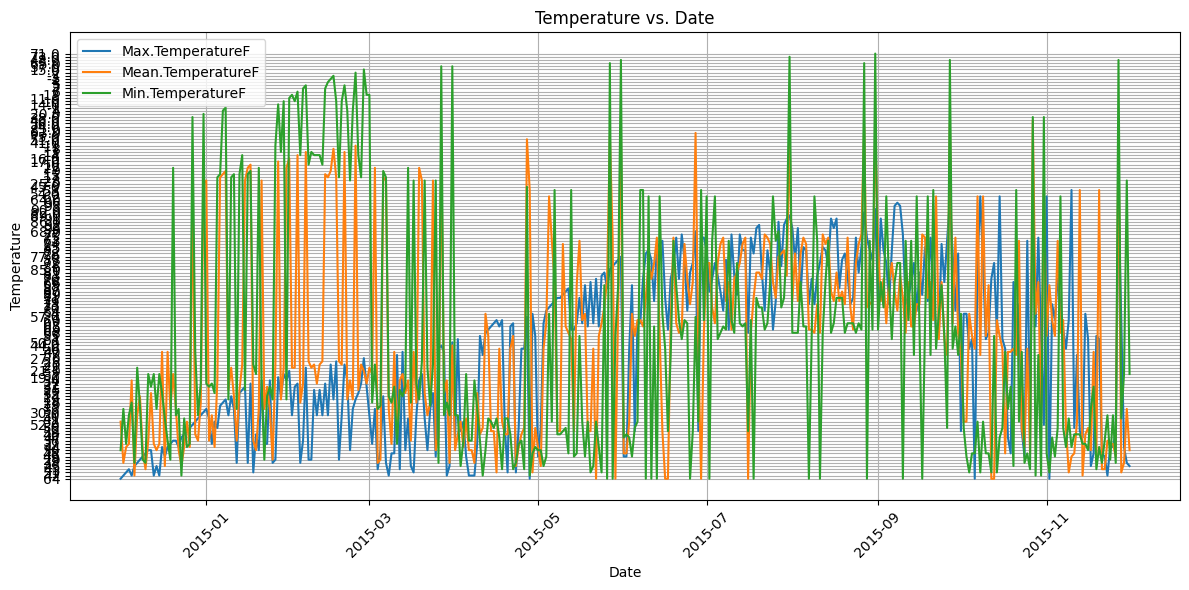

In [44]:
# prompt: Graph "Max.TemperatureF" , "Mean.TemperatureF" , "Min.TemperatureF" vs date, the data is on weather_result

weather_result[('value', 'Max.TemperatureF')] = weather_result[('value', 'Max.TemperatureF')].astype(str)
weather_result[('value', 'Mean.TemperatureF')] = weather_result[('value', 'Mean.TemperatureF')].astype(str)
weather_result[('value', 'Min.TemperatureF')] = weather_result[('value', 'Min.TemperatureF')].astype(str)

# Plotting Max.TemperatureF, Mean.TemperatureF, and Min.TemperatureF vs. date
plt.figure(figsize=(12, 6))
plt.plot(weather_result['date'], weather_result[('value', 'Max.TemperatureF')], label='Max.TemperatureF')
plt.plot(weather_result['date'], weather_result[('value', 'Mean.TemperatureF')], label='Mean.TemperatureF')
plt.plot(weather_result['date'], weather_result[('value', 'Min.TemperatureF')], label='Min.TemperatureF')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature vs. Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [46]:
# prompt: Pronostica la temperatura del siguiente día del último registro usando regresión lineal con los últimos 10 pasos.

from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
# Use the last 10 days of Mean.TemperatureF to predict the next day's temperature
# Convert the temperature values to numeric, handling potential errors
weather_result[('value', 'Mean.TemperatureF')] = pd.to_numeric(weather_result[('value', 'Mean.TemperatureF')], errors='coerce')

# Drop rows with NaN values in the 'Mean.TemperatureF' column
weather_result.dropna(subset=[('value', 'Mean.TemperatureF')], inplace=True)

# Extract the last 10 temperature values as features (X)
X = weather_result[('value', 'Mean.TemperatureF')][-10:].values.reshape(-1, 1)

# Extract the corresponding dates for the last 10 days
dates = weather_result['date'][-10:]

# Extract the temperatures for the last 10 days as the target variable (y)
y = weather_result[('value', 'Mean.TemperatureF')][-10:].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the temperature for the next day
next_day_temp = model.predict(np.array([[y[-1]]]))

print(f"Predicted temperature for the next day: {next_day_temp[0]}")

Predicted temperature for the next day: 39.0
